<a href="https://colab.research.google.com/github/Yaroslav-Maloshuk/Numerical_Analysis/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_7_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_6_%D0%9C%D0%B0%D0%BB%D0%BE%D1%88%D1%83%D0%BA_%D0%AF_%D0%92_%D0%A4%D0%86%D0%A2_2_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Малошук Я. В. Варіант 6

Перша інтерполяційна формула Ньютона

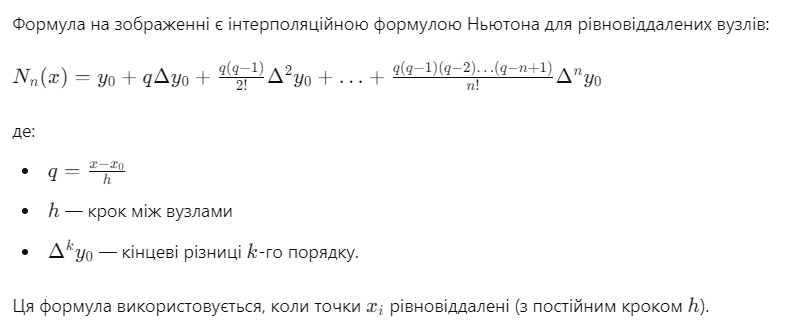

In [11]:
import numpy as np
from math import factorial

# №(Номер варіанта) = 6
# задані точки
x = np.array([0.115 + i * 0.005 for i in range(11)])  # x_i
y = np.array([8.6572, 8.2932, 7.9582, 7.6489, 7.3623, 7.0961, 6.8491, 6.6185, 6.3998, 6.1965, 6.0055]) # y_i

print(f"x_i: {x}")
print(f"y_i: {y}")

# Перша інтерполяційна формула Ньютона (інтерполяція  вперед)
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[0]) / h

    # Використання формули Ньютона для інтерполяції вперед
    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)  # Обчислення добутку q*(q-1)*(q-2)*...*(q-i+1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.122
x1 = 0.122 #Замінити точку вашого варіанту (точка на початку відрізку)
y1 = newton_forward_interpolation(x, y, x1)

print(f"f({x1}) = {y1}")

x_i: [0.115 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165]
y_i: [8.6572 8.2932 7.9582 7.6489 7.3623 7.0961 6.8491 6.6185 6.3998 6.1965
 6.0055]
f(0.122) = 8.155902991960065


Друга інтерполяційна формула Ньютона (інтерполяція назад)

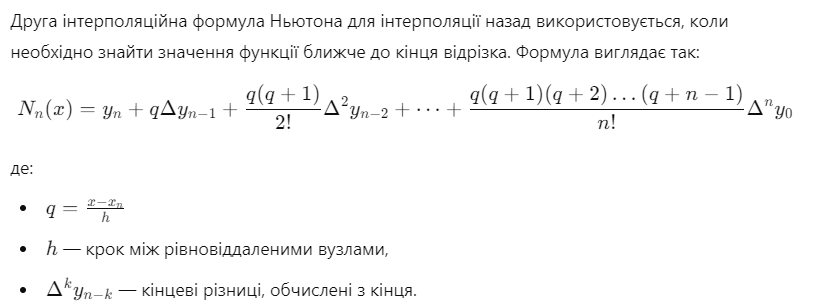

In [13]:
#import numpy as np
#from math import factorial

# задані точки
# x = np.array([0.115 + i * 0.005 for i in range(11)])  # x_i
# y = np.array([8.6572, 8.2932, 7.9582, 7.6489, 7.3623, 7.0961, 6.8491, 6.6185, 6.3998, 6.1965, 6.0055]) # y_i

# Друга інтерполяційна формула Ньютона (інтерполяція назад)
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[-1]) / h

    # Використання формули Ньютона для інтерполяції назад
    ans = delta_y[-1, 0]  # Починаємо з y_n
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)  # Обчислення добутку q*(q+1)*(q+2)*...*(q+i-1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.146
x2 = 0.146 #точка в кінці відрізка
y2 = newton_backward_interpolation(x, y, x2)

print(f"f({x2}) = {y2}")


f(0.146) = 6.801821223397376


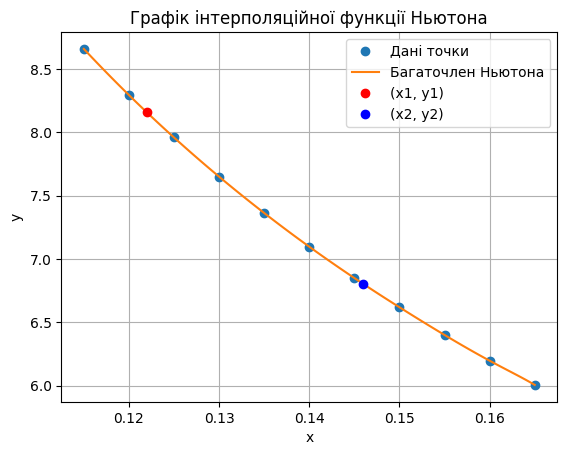

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    # Використовуйте відповідну функцію інтерполяції
    if xx[i] <= x[len(x) // 2]:  # Використовуємо інтерполяцію вперед для першої половини
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:  # Використовуємо інтерполяцію назад для другої половини
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label="Багаточлен Ньютона")
plt.plot(x1, y1, 'ro', label='(x1, y1)')
plt.plot(x2, y2, 'bo', label='(x2, y2)')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()